In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

## Importing IMG


In [70]:
image_path = 'C:\\Users\\tom19\\VScode_Projects\\Computer_vision\\preprocessing_data\images\\IMG_3206.JPG'
img = cv2.imread(image_path)

# Rescaling IMG

input image size: (4032, 3024, 3)
Output image size: [336, 252]


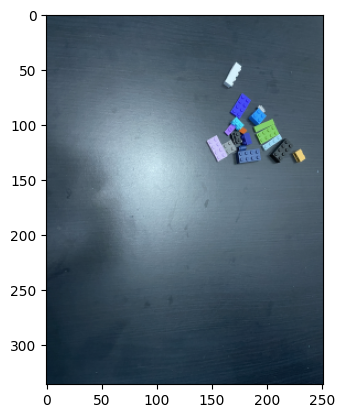

In [71]:
output_size = (int(4032/12), int(3024/12))

print(f"input image size: {img.shape}")

dims = (h, w) = img.shape[:2]  # skipping rgb dimension

max_dim = dims.index(max(dims))
dimension = [0, 0]
dimension[max_dim] = output_size[max_dim]
aspect = min(dims) / max(dims)
dimension[dimension.index(min(dimension))] = int(dimension[max_dim] * aspect)

print(f"Output image size: {dimension}")

resizedImage = cv2.resize(img, dimension[::-1], interpolation=cv2.INTER_AREA)


resizedImage = cv2.copyMakeBorder(
    resizedImage,
    top=output_size[0] - dimension[0],
    bottom=0,
    right=0,
    left=output_size[1] - dimension[1],
    borderType=cv2.BORDER_CONSTANT,
    value=[255, 255, 255],
)

plt.imshow(resizedImage, cmap='gray')
plt.show()

img = resizedImage

# Segmentation


0: 640x480 4 brickss, 122.9ms
Speed: 3.4ms preprocess, 122.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)


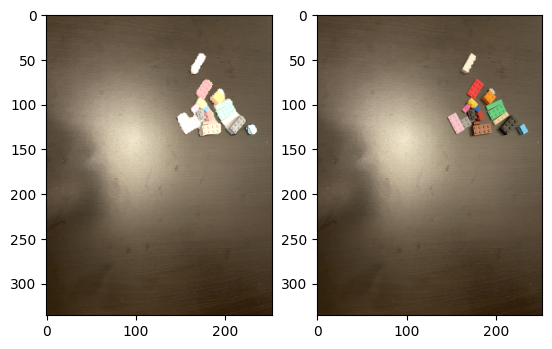

In [72]:
model_path = 'C:\\Users\\tom19\\VScode_Projects\\Computer_vision\\preprocessing_data\\best.pt'
output_path = ''
H, W, _ = img.shape

model = YOLO(model_path)
model = model.to('cpu')

results = model(img)

# Create an empty mask to accumulate all individual masks
combined_mask = np.zeros((H, W), dtype=np.uint8)

for result in results:
    for j, mask in enumerate(result.masks.data):
        # Convert mask to numpy array and resize to match the image size
        mask = mask.numpy() * 255
        mask = cv2.resize(mask, (W, H))
        
        # Add the current mask to the combined mask
        combined_mask = np.maximum(combined_mask, mask)

# Convert the combined mask to a 3-channel image with the same type as the original image
combined_mask_colored = cv2.cvtColor(combined_mask, cv2.COLOR_GRAY2BGR).astype(img.dtype)

# Set the transparency level (adjust as needed)
alpha = 0.5

# Overlay the combined mask onto the original image
result_image = cv2.addWeighted(img, 1.0, combined_mask_colored, alpha, 0)
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
name = image_path.split("\\")

# Save the result
# cv2.imwrite(f'.{output_path}/mask_{name[-1]}', combined_mask)
# plt.imshow(result_image)
# plt.show()

img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.subplot(1, 2, 1)
plt.imshow(result_image)
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.show()
mask = combined_mask

# proposal regions out of segmentation

In [73]:
# combined_mask = np.uint8(combined_mask)
# plt.imshow(combined_mask, cmap = 'gray')
# plt.show()
# (cnt, hierarchy) = cv2.findContours( 
#     combined_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# for c in cnt:
#     # Get the bounding box for the contour
#     b_box = cv2.boundingRect(c)
    
#     # Now you can use b_box as needed
#     x, y, w, h = b_box
#     print("Bounding Box:", b_box)
#     # Do something with the bounding box, e.g., draw it on the original image
#     cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (155, 155, 155), 2)

# print(combined_mask.shape)
# plt.imshow(img_rgb, cmap = 'gray')
# plt.show()

# Dilate

In [74]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
# dilate = cv2.dilate(mask, kernel, iterations=1)

# mask[mask > 0] = 1
# dilate[dilate > 0] = 1
# edges = dilate - mask
# mask = dilate


# dilate[dilate > 0] = 255

# combined_mask_colored = cv2.cvtColor(dilate, cv2.COLOR_GRAY2BGR).astype(img.dtype)

# # Set the transparency level (adjust as needed)
# alpha = 0.5

# # Overlay the combined mask onto the original image
# result_image1 = cv2.addWeighted(img, 1.0, combined_mask_colored, alpha, 0)
# result_image1 = cv2.cvtColor(result_image1, cv2.COLOR_BGR2RGB)

# plt.subplots(figsize=(15, 25))
# plt.subplot(1, 3, 1)
# plt.imshow(edges, cmap='gray')
# plt.subplot(1, 3, 2)
# plt.imshow(result_image)
# plt.subplot(1, 3, 3)
# plt.imshow(result_image1)
# plt.show()




# Cut in a mask IMG

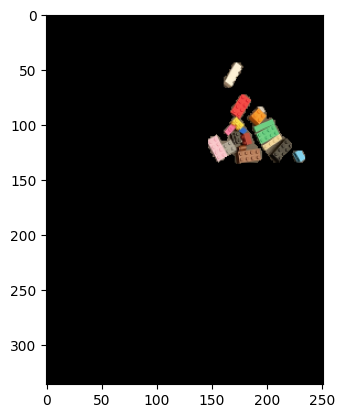

In [75]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def cut_mask(img, mask):
    mask[mask > 0] = 1
    for i in range(img.shape[2]):
        img[:,:,i] = mask * img[:,:,i]
    return img

plt.imshow(cut_mask(img, mask))
plt.show()

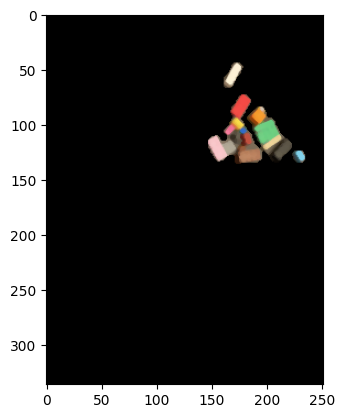

In [76]:
for i in range(3):
    img = cv2.medianBlur(img, 3)
plt.imshow(img)
plt.show()

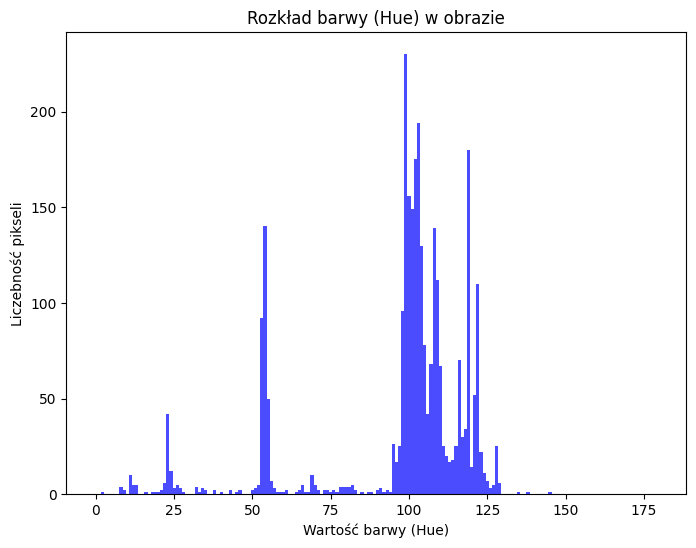

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_hue_histogram(img):


    # Przekształć obraz na przestrzeń kolorów HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Pobierz tylko kanał H (barwa)
    hue_channel = img_hsv[:,:,0].flatten()
    hue_channel = [x for x in hue_channel if x != 0]

        # Wygeneruj histogram kanału H
    hist, bins = np.histogram(hue_channel, bins=180, range=[0, 180])

    # Wykres histogramu
    plt.figure(figsize=(8, 6))
    plt.bar(bins[:-1], hist, width=1, color='blue', alpha=0.7)
    plt.title('Rozkład barwy (Hue) w obrazie')
    plt.xlabel('Wartość barwy (Hue)')
    plt.ylabel('Liczebność pikseli')
    plt.show()


# Wywołaj funkcję do wyświetlenia histogramu barwy (Hue)
display_hue_histogram(img)

In [78]:
# import numpy as np
# import cv2 as cv
# import matplotlib.pyplot as plt

# # Convert the image to HSV
# # img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# # Reshape the image
# Z = img.reshape((-1, 1))
# Z = np.float32(Z)

# # Define criteria, number of clusters (K), and apply kmeans()
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# # Generate an elbow plot to determine the optimal number of clusters (K)
# distortions = []
# K_range = range(1, 5)  # You can adjust the range of K based on your requirement

# for k in K_range:
#     ret, label, center = cv.kmeans(Z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#     distortions.append(ret)

# # Plot the elbow curve
# plt.plot(K_range[1:], distortions[1:], 'bx-')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion')
# plt.title('Elbow Method for Optimal K')
# plt.show()

# # Choose the optimal K based on the elbow plot
# optimal_K = 12  # Manually select the optimal K based on the elbow plot

# # Apply kmeans with the optimal K
# ret, label, center = cv.kmeans(Z, optimal_K, None, criteria, 1, cv.KMEANS_PP_CENTERS)

# # Convert back into uint8, and make the original image
# center = np.uint8(center)
# res = center[label.flatten()]
# res2 = res.reshape(img.shape)

# # Display the clustered image
# plt.imshow(res2)
# plt.title(f'Clustered Image with K={optimal_K}')
# plt.show()

# Canny 1

(336, 252)


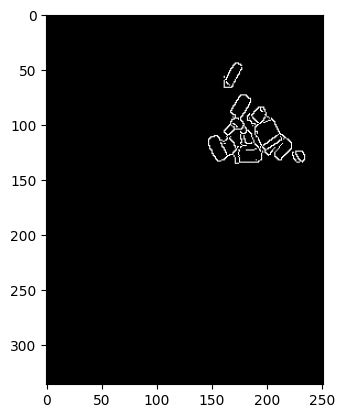

In [79]:
# blured_img = cv2.blur(img, (5, 5))
# plt.imshow(blured_img)
# plt.show()

img_canny = cv2.Canny(img, 200, 200)
print(img_canny.shape)

# Apply zero crossing detection
# zero_crossings = np.zeros_like(gradient_magnitude, dtype=np.uint8)
# zero_crossings[significant_edges] = 255


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
dilate = cv2.dilate(img_canny, kernel, iterations=1)


plt.imshow(img_canny, cmap = 'gray')
plt.show()

In [80]:
(cnt, hierarchy) = cv2.findContours( 
    img_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

print(len(cnt))

11


# HSV LOOP

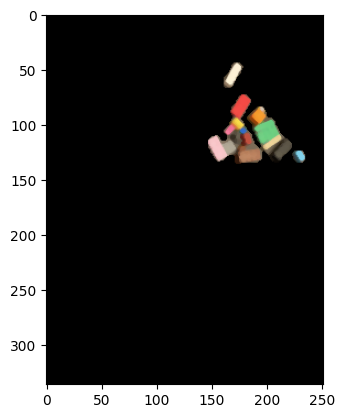

[0 0 0]
[  9 255 255]


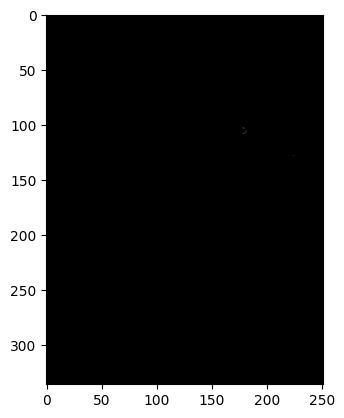

[9 0 0]
[ 18 255 255]


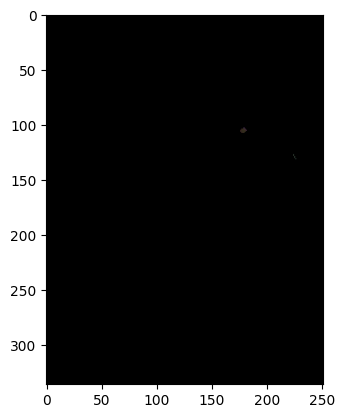

[18  0  0]
[ 27 255 255]


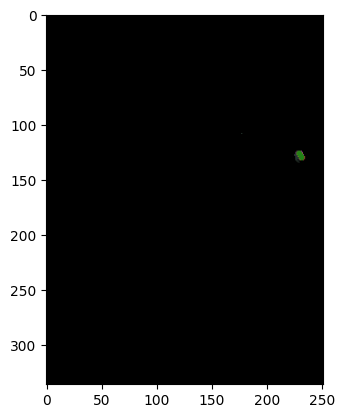

[27  0  0]
[ 36 255 255]


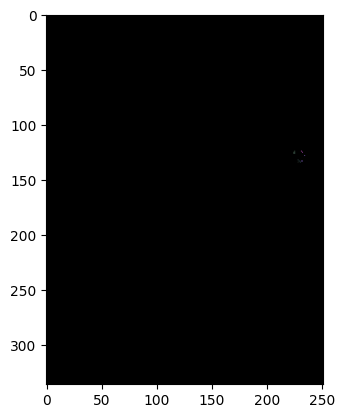

[36  0  0]
[ 45 255 255]


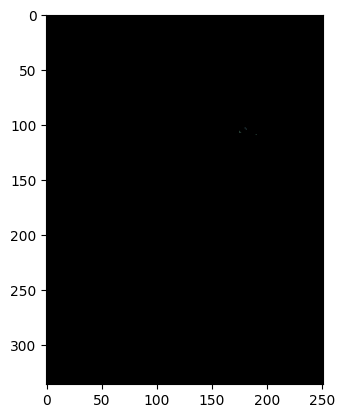

[45  0  0]
[ 54 255 255]


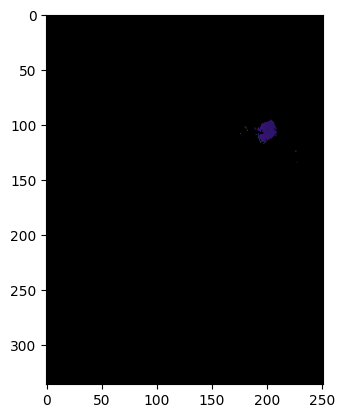

[54  0  0]
[ 63 255 255]


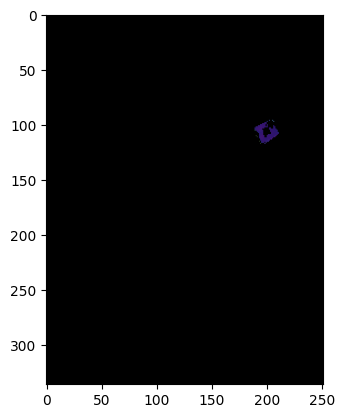

[63  0  0]
[ 72 255 255]


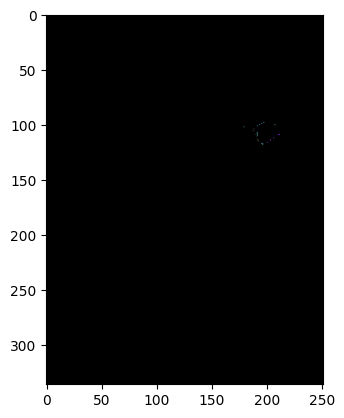

[72  0  0]
[ 81 255 255]


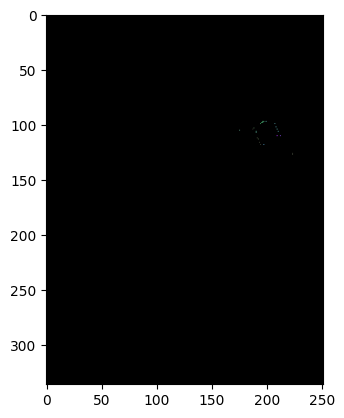

[81  0  0]
[ 90 255 255]


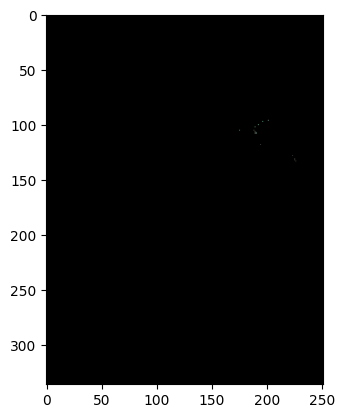

[90  0  0]
[ 99 255 255]


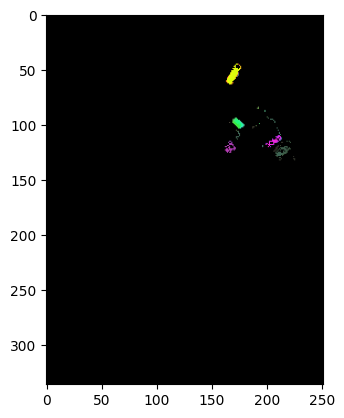

[99  0  0]
[108 255 255]


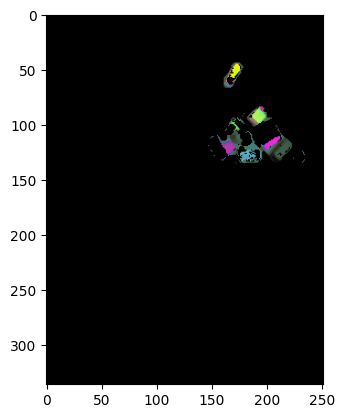

[108   0   0]
[117 255 255]


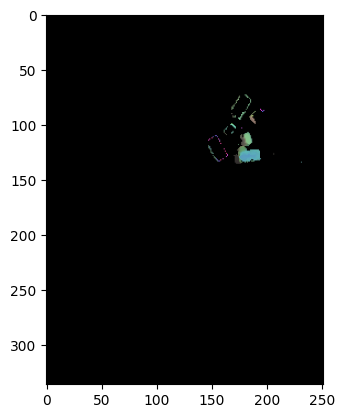

[117   0   0]
[126 255 255]


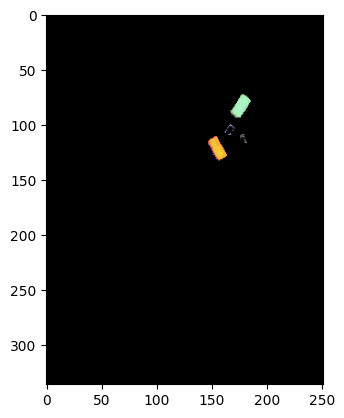

[126   0   0]
[135 255 255]


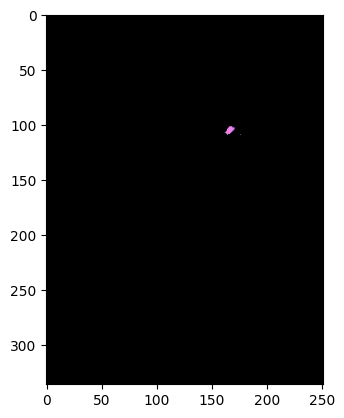

[135   0   0]
[144 255 255]


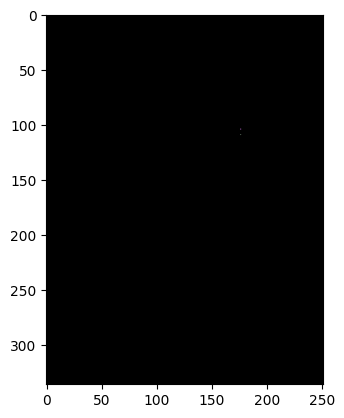

[144   0   0]
[153 255 255]


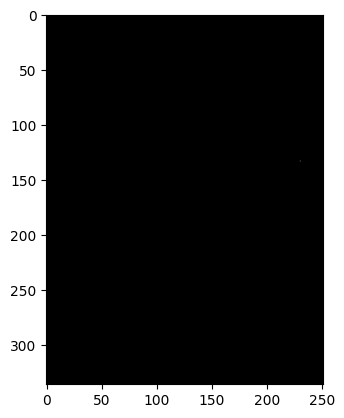

[153   0   0]
[162 255 255]


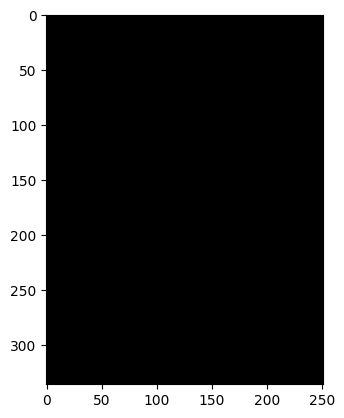

[162   0   0]
[171 255 255]


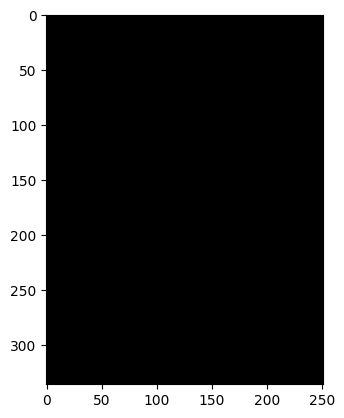

[171   0   0]
[180 255 255]


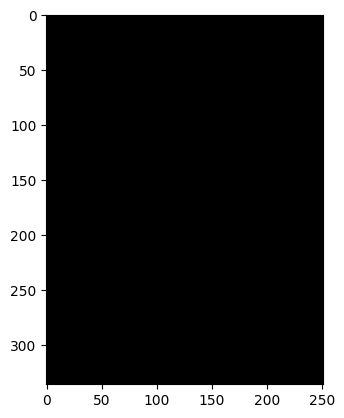

In [81]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)
plt.show()

color_number = 20
num, div = 180, color_number
l = np.array([0, 0 , 0])
d = np.array([0, 255 , 255])
range_list = [num // div + (1 if x < num % div else 0)  for x in range (div)]

def hsv_loop(img):
    iter = 0
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range_list:
        
        if iter == 0:
            d[0] = i
            print(l)
            print(d)
            mask = cv2.inRange(img_hsv, l, d)            
            result = cv2.bitwise_and(img, img, mask=mask)
            result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
            plt.imshow(result)
            plt.show()

    
        else:
            l[0] += range_list[iter-1]
            d[0] += i
            
            print(l)
            print(d)
            mask = cv2.inRange(img_hsv, l, d)
            result = cv2.bitwise_and(img, img, mask=mask)
            result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
            plt.imshow(result)
            plt.show()
        iter += 1

hsv_loop(img)



# Canny

In [82]:
# # blured_img = cv2.blur(img, (5, 5))
# # plt.imshow(blured_img)
# # plt.show()

# hsv_nemo = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# hsv_nemo[:,:,1] = hsv_nemo[:,:,1] + 50
# print(len(hsv_nemo[:,:,1][hsv_nemo[:,:,1] > 249]))
# hsv_nemo[:,:,1][hsv_nemo[:,:,1] > 249] = 249

# hsv_nemo = cv2.cvtColor(hsv_nemo, cv2.COLOR_HSV2RGB)
# blured_img = hsv_nemo
# plt.imshow(hsv_nemo)
# plt.show()
# img_canny = cv2.Canny(blured_img, 190, 190)
# print(img_canny.shape)

# # Apply zero crossing detection
# # zero_crossings = np.zeros_like(gradient_magnitude, dtype=np.uint8)
# # zero_crossings[significant_edges] = 255


# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
# dilate = cv2.dilate(img_canny, kernel, iterations=1)


# plt.imshow(dilate, cmap = 'gray')
# plt.show()

# Edges Count

In [83]:
(cnt, hierarchy) = cv2.findContours( 
    dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

print(len(cnt))

3


# Region proposals

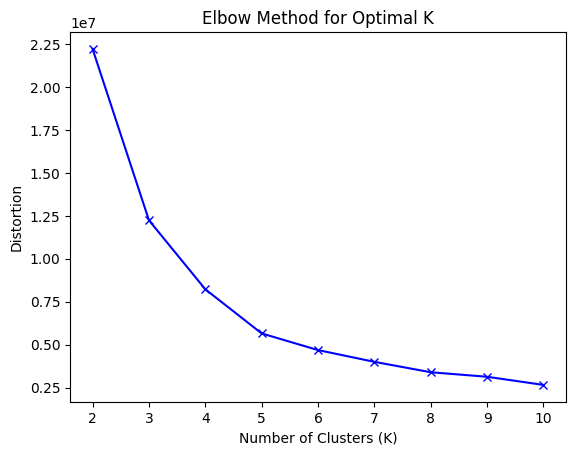

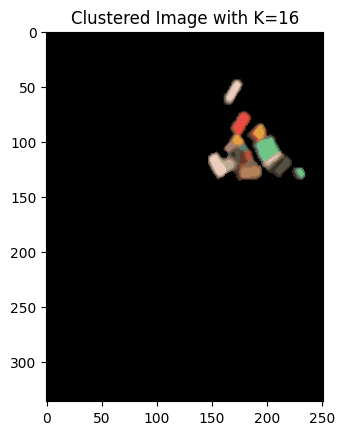

In [84]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv2.blur(img, (5, 5))

img = cut_mask(img, mask)

# Convert the image to HSV
# img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Reshape the image
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# Define criteria, number of clusters (K), and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Generate an elbow plot to determine the optimal number of clusters (K)
distortions = []
K_range = range(1, 11)  # You can adjust the range of K based on your requirement

for k in K_range:
    ret, label, center = cv.kmeans(Z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    distortions.append(ret)

# Plot the elbow curve
plt.plot(K_range[1:], distortions[1:], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal K based on the elbow plot
optimal_K = 16  # Manually select the optimal K based on the elbow plot

# Apply kmeans with the optimal K
ret, label, center = cv.kmeans(Z, optimal_K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back into uint8, and make the original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(img.shape)

# Display the clustered image
plt.imshow(res2)
plt.title(f'Clustered Image with K={optimal_K}')
plt.show()

[[7]
 [7]
 [7]
 ...
 [7]
 [7]
 [7]]


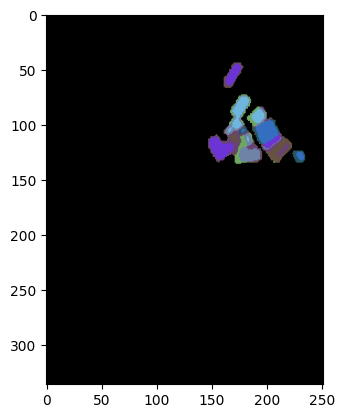

In [85]:
import numpy as np
import cv2 as cv
img = cut_mask(img, mask)

img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
print(label)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(res2)
plt.show()